In [1]:
from model import ModelHandler
from DataLoader import DiagnosisEnd2End
import numpy as np
import tqdm
import torch
from Unet2 import UNET
from results_analysis import results
from ImageTransformations import otsu, mnorm


model = UNET(1, 1)
model.load_state_dict(torch.load("unet_segment.pth"))


def otsu_norm_transf(x): return otsu(mnorm(x, -680, 340))

## End2End Data

In [2]:
path_segmentation = "C:/Users/Usuario/Desktop/Uni/DataDaniMAPSIV/PSIV/02-Cancer_diagnosis/data/Diagnosis/"
nodules_path = "../data/Diagnosis/Radiolung_NoduleDiagnosis.csv"

In [3]:
diagonis = DiagnosisEnd2End(path_segmentation, nodules_path)

X_data_curated = np.zeros((49, 14, 64, 64))
y_data_curated = np.zeros(49)
i = 0

for idx in tqdm.tqdm(range(len(diagonis))):
    data = diagonis[idx]
    m = data['ROI'].shape[0]//2   
    X_data_curated[i] = otsu_norm_transf(model(torch.from_numpy(data["ROI"][m-7:m+7, :, :]).reshape((14, 1, 64, 64)).float()).detach().numpy().reshape((14, 64, 64)))
    y_data_curated[i] = data['GT'] if type(data['GT']) != type([]) else data['GT'][0]
    i+=1


  0%|          | 0/49 [00:00<?, ?it/s]

Len Dataloader: 49 // Actual index: 0 // Len diagnosis path 47 // Len anonymous nodules 49


  2%|▏         | 1/49 [00:02<01:48,  2.25s/it]

Len Dataloader: 49 // Actual index: 1 // Len diagnosis path 47 // Len anonymous nodules 49


  4%|▍         | 2/49 [00:05<02:07,  2.72s/it]

Len Dataloader: 49 // Actual index: 2 // Len diagnosis path 47 // Len anonymous nodules 49


  6%|▌         | 3/49 [00:08<02:21,  3.07s/it]

Len Dataloader: 49 // Actual index: 3 // Len diagnosis path 47 // Len anonymous nodules 49


  8%|▊         | 4/49 [00:11<02:13,  2.96s/it]

Len Dataloader: 49 // Actual index: 4 // Len diagnosis path 47 // Len anonymous nodules 49


 10%|█         | 5/49 [00:16<02:35,  3.52s/it]

Len Dataloader: 49 // Actual index: 5 // Len diagnosis path 47 // Len anonymous nodules 49


 12%|█▏        | 6/49 [00:18<02:11,  3.07s/it]

Len Dataloader: 49 // Actual index: 6 // Len diagnosis path 47 // Len anonymous nodules 49


 14%|█▍        | 7/49 [00:21<02:05,  2.98s/it]

Len Dataloader: 49 // Actual index: 7 // Len diagnosis path 47 // Len anonymous nodules 49


 16%|█▋        | 8/49 [00:22<01:43,  2.53s/it]

Len Dataloader: 49 // Actual index: 8 // Len diagnosis path 47 // Len anonymous nodules 49


 18%|█▊        | 9/49 [00:24<01:37,  2.45s/it]

Len Dataloader: 49 // Actual index: 9 // Len diagnosis path 47 // Len anonymous nodules 49


 20%|██        | 10/49 [00:27<01:40,  2.59s/it]

Len Dataloader: 49 // Actual index: 10 // Len diagnosis path 47 // Len anonymous nodules 49


 22%|██▏       | 11/49 [00:30<01:40,  2.66s/it]

Len Dataloader: 49 // Actual index: 11 // Len diagnosis path 47 // Len anonymous nodules 49


 24%|██▍       | 12/49 [00:33<01:38,  2.67s/it]

Len Dataloader: 49 // Actual index: 12 // Len diagnosis path 47 // Len anonymous nodules 49


 27%|██▋       | 13/49 [00:35<01:35,  2.66s/it]

Len Dataloader: 49 // Actual index: 13 // Len diagnosis path 47 // Len anonymous nodules 49


 29%|██▊       | 14/49 [00:39<01:36,  2.77s/it]

Len Dataloader: 49 // Actual index: 14 // Len diagnosis path 47 // Len anonymous nodules 49


 31%|███       | 15/49 [00:41<01:34,  2.79s/it]

Len Dataloader: 49 // Actual index: 15 // Len diagnosis path 47 // Len anonymous nodules 49


 33%|███▎      | 16/49 [00:44<01:31,  2.78s/it]

Len Dataloader: 49 // Actual index: 16 // Len diagnosis path 47 // Len anonymous nodules 49


 35%|███▍      | 17/49 [00:47<01:32,  2.90s/it]

Len Dataloader: 49 // Actual index: 17 // Len diagnosis path 47 // Len anonymous nodules 49


 37%|███▋      | 18/49 [00:50<01:27,  2.81s/it]

Len Dataloader: 49 // Actual index: 18 // Len diagnosis path 47 // Len anonymous nodules 49


 39%|███▉      | 19/49 [00:50<01:03,  2.12s/it]

Len Dataloader: 49 // Actual index: 19 // Len diagnosis path 47 // Len anonymous nodules 49


 41%|████      | 20/49 [00:54<01:11,  2.47s/it]

Len Dataloader: 49 // Actual index: 20 // Len diagnosis path 47 // Len anonymous nodules 49


 43%|████▎     | 21/49 [01:02<01:55,  4.12s/it]

Len Dataloader: 49 // Actual index: 21 // Len diagnosis path 47 // Len anonymous nodules 49


 45%|████▍     | 22/49 [01:05<01:48,  4.01s/it]

Len Dataloader: 49 // Actual index: 22 // Len diagnosis path 47 // Len anonymous nodules 49


 47%|████▋     | 23/49 [01:10<01:45,  4.05s/it]

Len Dataloader: 49 // Actual index: 23 // Len diagnosis path 47 // Len anonymous nodules 49


 49%|████▉     | 24/49 [01:13<01:36,  3.85s/it]

Len Dataloader: 49 // Actual index: 24 // Len diagnosis path 47 // Len anonymous nodules 49


 51%|█████     | 25/49 [01:16<01:30,  3.75s/it]

Len Dataloader: 49 // Actual index: 25 // Len diagnosis path 47 // Len anonymous nodules 49


 53%|█████▎    | 26/49 [01:22<01:36,  4.20s/it]

Len Dataloader: 49 // Actual index: 26 // Len diagnosis path 47 // Len anonymous nodules 49


 55%|█████▌    | 27/49 [01:22<01:09,  3.15s/it]

Len Dataloader: 49 // Actual index: 27 // Len diagnosis path 47 // Len anonymous nodules 49


 57%|█████▋    | 28/49 [01:26<01:09,  3.32s/it]

Len Dataloader: 49 // Actual index: 28 // Len diagnosis path 47 // Len anonymous nodules 49


 59%|█████▉    | 29/49 [01:32<01:24,  4.22s/it]

Len Dataloader: 49 // Actual index: 29 // Len diagnosis path 47 // Len anonymous nodules 49


 61%|██████    | 30/49 [01:38<01:30,  4.76s/it]

Len Dataloader: 49 // Actual index: 30 // Len diagnosis path 47 // Len anonymous nodules 49


 63%|██████▎   | 31/49 [01:46<01:42,  5.69s/it]

Len Dataloader: 49 // Actual index: 31 // Len diagnosis path 47 // Len anonymous nodules 49


 65%|██████▌   | 32/49 [01:52<01:35,  5.63s/it]

Len Dataloader: 49 // Actual index: 32 // Len diagnosis path 47 // Len anonymous nodules 49


 67%|██████▋   | 33/49 [01:57<01:25,  5.36s/it]

Len Dataloader: 49 // Actual index: 33 // Len diagnosis path 47 // Len anonymous nodules 49


 69%|██████▉   | 34/49 [01:58<01:02,  4.15s/it]

Len Dataloader: 49 // Actual index: 34 // Len diagnosis path 47 // Len anonymous nodules 49


 71%|███████▏  | 35/49 [02:03<01:04,  4.58s/it]

Len Dataloader: 49 // Actual index: 35 // Len diagnosis path 47 // Len anonymous nodules 49


 73%|███████▎  | 36/49 [02:09<01:03,  4.87s/it]

Len Dataloader: 49 // Actual index: 36 // Len diagnosis path 47 // Len anonymous nodules 49


 76%|███████▌  | 37/49 [02:10<00:43,  3.59s/it]

Len Dataloader: 49 // Actual index: 37 // Len diagnosis path 47 // Len anonymous nodules 49


 78%|███████▊  | 38/49 [02:11<00:33,  3.00s/it]

Len Dataloader: 49 // Actual index: 38 // Len diagnosis path 47 // Len anonymous nodules 49


 80%|███████▉  | 39/49 [02:12<00:24,  2.43s/it]

Len Dataloader: 49 // Actual index: 39 // Len diagnosis path 47 // Len anonymous nodules 49


 82%|████████▏ | 40/49 [02:13<00:15,  1.77s/it]

Len Dataloader: 49 // Actual index: 40 // Len diagnosis path 47 // Len anonymous nodules 49


 84%|████████▎ | 41/49 [02:14<00:13,  1.66s/it]

Len Dataloader: 49 // Actual index: 41 // Len diagnosis path 47 // Len anonymous nodules 49


 86%|████████▌ | 42/49 [02:15<00:10,  1.50s/it]

Len Dataloader: 49 // Actual index: 42 // Len diagnosis path 47 // Len anonymous nodules 49


 88%|████████▊ | 43/49 [02:16<00:08,  1.44s/it]

Len Dataloader: 49 // Actual index: 43 // Len diagnosis path 47 // Len anonymous nodules 49


 90%|████████▉ | 44/49 [02:17<00:05,  1.11s/it]

Len Dataloader: 49 // Actual index: 44 // Len diagnosis path 47 // Len anonymous nodules 49


 92%|█████████▏| 45/49 [02:18<00:04,  1.13s/it]

Len Dataloader: 49 // Actual index: 45 // Len diagnosis path 47 // Len anonymous nodules 49


 94%|█████████▍| 46/49 [02:19<00:03,  1.23s/it]

Len Dataloader: 49 // Actual index: 46 // Len diagnosis path 47 // Len anonymous nodules 49


 96%|█████████▌| 47/49 [02:24<00:04,  2.36s/it]

Len Dataloader: 49 // Actual index: 47 // Len diagnosis path 47 // Len anonymous nodules 49


 98%|█████████▊| 48/49 [02:28<00:02,  2.82s/it]

Len Dataloader: 49 // Actual index: 48 // Len diagnosis path 47 // Len anonymous nodules 49


100%|██████████| 49/49 [02:31<00:00,  3.08s/it]


## SVM

In [11]:
svm = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'SVM', n_splits = 5)
svm.fit(True,True)

[INFO] The best parameters are {'C': 0.01, 'kernel': 'poly'}
[INFO] The best score is 0.8000
[INFO] The best parameters according to ci are {'C': 10000.0, 'kernel': 'rbf'}


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


[INFO] Train acc  is : 1.0000


In [10]:
svm.top_params(0.95, 5)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,C,kernel,mean,sem,ci,sort
10,"{'C': 10000.0, 'kernel': 'rbf'}",0.8,0.8,0.8,0.8,0.8,1.000000e+04,rbf,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
13,"{'C': 10000000.0, 'kernel': 'poly'}",0.8,0.8,0.8,0.8,0.8,1.000000e+07,poly,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
2,"{'C': 0.01, 'kernel': 'rbf'}",0.8,0.8,0.8,0.8,0.8,1.000000e-02,rbf,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
3,"{'C': 0.01, 'kernel': 'sigmoid'}",0.8,0.8,0.8,0.8,0.8,1.000000e-02,sigmoid,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
18,"{'C': 10000000000.0, 'kernel': 'rbf'}",0.8,0.8,0.8,0.8,0.8,1.000000e+10,rbf,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Gill Sans'] not found. Falling back to DejaVu Sans.


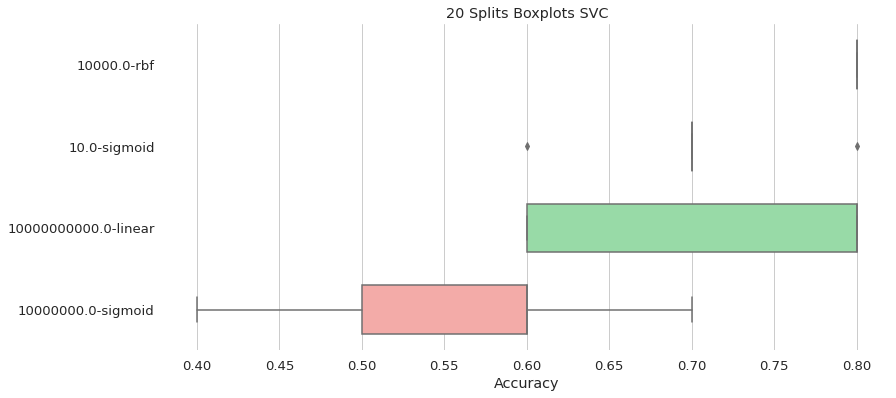

In [6]:
svm.boxplots(20)

In [ ]:
results(X_data_curated,y_data_curated,'SVM', 5)

## KNN

In [7]:
knn = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'KNN', n_splits = 5)
knn.fit(True,True)

[INFO] The best parameters are {'algorithm': 'auto', 'n_neighbors': 7, 'p': 2}
[INFO] The best score is 0.8000
[INFO] The best parameters according to ci are {'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}
[INFO] Train acc  is : 0.8163


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
knn.top_params(0.95, 5)

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,algorithm,n_neighbors,p,mean,sem,ci,sort
31,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 2}",0.8,0.8,0.8,0.8,0.8,brute,9,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
30,"{'algorithm': 'brute', 'n_neighbors': 9, 'p': 1}",0.8,0.8,0.8,0.8,0.8,brute,9,1,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
22,"{'algorithm': 'kd_tree', 'n_neighbors': 9, 'p'...",0.8,0.8,0.8,0.8,0.8,kd_tree,9,1,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
21,"{'algorithm': 'kd_tree', 'n_neighbors': 7, 'p'...",0.8,0.8,0.8,0.8,0.8,kd_tree,7,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4
15,"{'algorithm': 'ball_tree', 'n_neighbors': 9, '...",0.8,0.8,0.8,0.8,0.8,ball_tree,9,2,0.8,1.000000e-08,"(0.799999972235549, 0.8000000277644511)",0.4


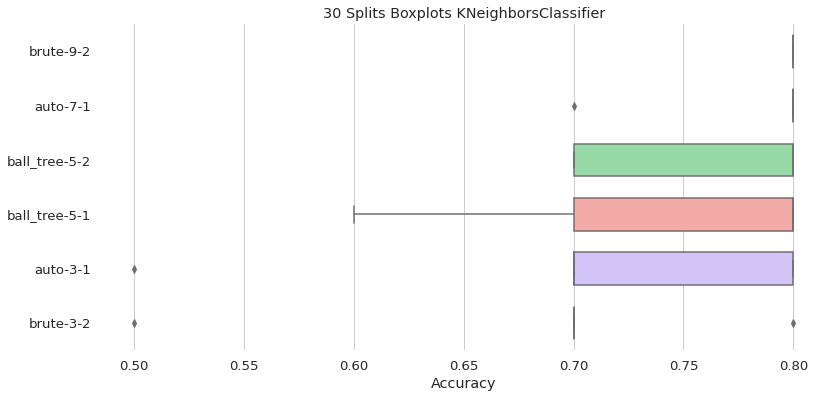

In [12]:
knn.boxplots(30)

In [ ]:
results(X_data_curated,y_data_curated,'KNN', 5)

## Decision Tree

In [13]:
dt = ModelHandler(X = X_data_curated, Y = y_data_curated, model = 'DT', n_splits = 5)
dt.fit(True,True)

[INFO] The best parameters are {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}
[INFO] The best score is 0.6800
[INFO] The best parameters according to ci are {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'random'}
[INFO] Train acc  is : 1.0000


In [14]:
dt.top_params(0.95, 5)

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,criterion,max_features,splitter,mean,sem,ci,sort
5,"{'criterion': 'gini', 'max_features': 'log2', ...",0.6,0.5,0.8,0.7,0.7,gini,log2,random,0.66,0.050990,"(0.5184284945373214, 0.8015715054626784)",0.259214
4,"{'criterion': 'gini', 'max_features': 'log2', ...",0.5,0.6,0.7,0.8,0.8,gini,log2,best,0.68,0.058310,"(0.5181067937646784, 0.8418932062353217)",0.259053
9,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.7,0.6,0.5,0.8,0.6,entropy,sqrt,random,0.64,0.050990,"(0.49842849453732135, 0.7815715054626784)",0.249214
11,"{'criterion': 'entropy', 'max_features': 'log2...",0.5,0.5,0.6,0.7,0.7,entropy,log2,random,0.60,0.044721,"(0.4758335724151723, 0.7241664275848276)",0.237917
6,"{'criterion': 'entropy', 'max_features': 'auto...",0.5,0.6,0.7,0.5,0.8,entropy,auto,best,0.62,0.058310,"(0.45810679376467817, 0.7818932062353217)",0.229053


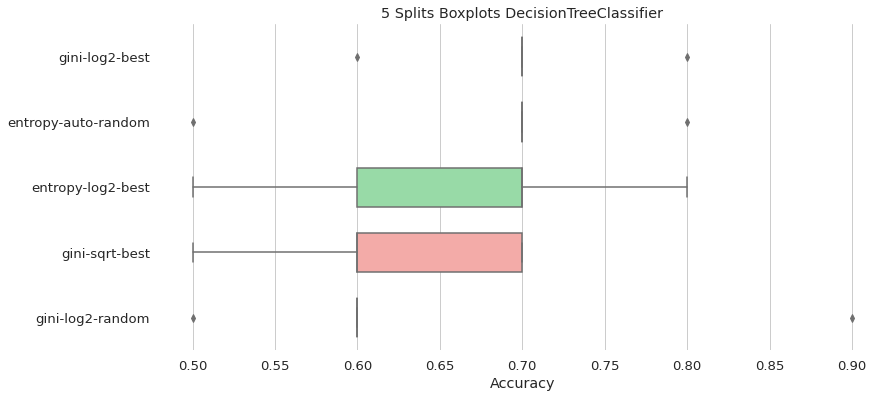

In [ ]:
dt.boxplots(5)

In [ ]:
results(X_data_curated,y_data_curated,'DT', 5)